# Project: Wrangling and Analyze Data

### Overview:
Using tweets from the WeRateDogs Twitter account, the WeRateDogs project analyzes the content of the tweets. Gathering, evaluating, and cleaning data from various sources is the major goal of this project. After that, exploratory data analysis will be used to draw conclusions and information from the data. To convey a narrative and highlight significant trends and patterns, the ultimate objective is to produce engaging and convincing visualizations and summaries of the data.

### Package Importing

In [59]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import json
import re
import warnings
warnings.filterwarnings("ignore")

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [60]:
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [61]:
#if directory doesnt exist create one
folder_name = 'image_predictions'
os.makedirs(folder_name, exist_ok=True)

In [62]:
#Storing url in a variable and check for functionality of the request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [63]:
#To write to the created file
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [64]:
#Creating the file into a dataframe
image_predictions = pd.read_csv(url, sep = '\t')

In [65]:
#View the dataframe to check if it is imported correctly
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### NOTE:
Please note that my application for a Twitter developer account for this project was not approved. As a result, I obtained the "tweet_json.txt" file from the supporting materials section in the classroom, instead of accessing the Twitter data through a developer account. The next three cells were adapted from the Twitter API code in the supporting materials provided by the Udacity instructor.

In [66]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [67]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df['tweet_id'].values
print(len(tweet_ids))

2356


In [ ]:
# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [68]:
# Initialize an empty list to store tweet data
tweet_data_list = []

# Start timing the execution
start = timer()

# Read data from the tweet-json.txt file
with open('tweet_json.txt') as tweet_json_file:
    for i, line in enumerate(tweet_json_file):
        tweet_json = json.loads(line)
        tweet_data = {
            'tweet_id': int(tweet_json['id']),
            'retweet_count': int(tweet_json['retweet_count']),
            'favorite_count': int(tweet_json['favorite_count'])
        }
        tweet_data_list.append(tweet_data)

# Convert the list of dictionaries to a Pandas DataFrame
tweet_data_df = pd.DataFrame(tweet_data_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

# End timing and print execution time
end = timer()
print(f'Processed {i+1} tweets in {end - start:.2f} seconds.')


Processed 2354 tweets in 0.32 seconds.


In [69]:
#Checking the dataframe for correctness
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing The Enhanced Twitter Dataset
twitter_df as assigned by my analysis

In [70]:
#Scroll through the dataset to analysis and spot any issue
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [71]:
# To get an overview of the dataframe 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [72]:
#Random sampling the dataframe to spot issue
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2062,671163268581498880,NaN,NaN,2015-11-30 03:06:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671163268...,8,10,None,None,None,None,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo,None,None,None
1309,707059547140169728,NaN,NaN,2016-03-08 04:25:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cupcake. She's an Icelandic Dippe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707059547...,11,10,Cupcake,None,None,None,None


In [73]:
#To check the volume of data by the rows and columns 
twitter_df.shape

(2356, 17)

In [74]:
#To get relevant statistic for the numeric variables as regard the dataset
#Noticed that the only meaningful variables i will need statistic for are rating_numerator and rating_denominator
twitter_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [75]:
#To find nulls or missing values
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [76]:
#Duplicated values
twitter_df.duplicated().sum()

0

In [77]:
#List the names of the columns 
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [78]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [79]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [80]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [81]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [82]:
#Sorting the counts of the unique values of rating_denominator in descending value
rating_denominator_counts = twitter_df.rating_denominator.value_counts()
sorted_rating_denominator_counts = rating_denominator_counts.sort_index(ascending = False)
print(sorted_rating_denominator_counts)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64


In [83]:
#To check observation where rating denominator is not 10
rating_denominator_not_10 = twitter_df.rating_denominator[twitter_df.rating_denominator != 10]

count_rating_denominator_not_10 = len(rating_denominator_not_10)

print(count_rating_denominator_not_10)

23


This is an issue with inconsistency and will be treated later in the later phase.

### Assessing Image Prediction Dataset
image_predictions as assigned by my analysis

In [84]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [85]:
# To get an overview of the dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,1,Border_collie,0.462408,True,collie,0.214556,True,Eskimo_dog,0.035604,True
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True
1196,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True


In [87]:
image_predictions.shape

(2075, 12)

In [88]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [89]:
#To find nulls or missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [90]:
#Duplicated values
image_predictions.duplicated().sum()

0

##### To get unique counts of variables

In [91]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [92]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [93]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [94]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

### Assessing Twitter API Extracted Dataset
tweet_data_df as assigned by my analysis

In [95]:
tweet_data_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [96]:
#To get an overview of the dataframe
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [97]:
#Random sampling
tweet_data_df.sample(5)

,tweet_id,retweet_count,favorite_count
538,806576416489959424,2230,5370
1989,672622327801233409,542,1377
1590,686394059078897668,769,1928
490,813800681631023104,2060,9300
61,880095782870896641,4533,28150


In [98]:
#To find missing and null values
tweet_data_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [99]:
#Duplicated values
tweet_data_df.duplicated().sum()

0

### Quality issues
1. I just require Tweets, not Retweets, hence the Retweeted status id has to be dropped.

2. Instead of just text, the source column is a href (combination of url and text)

3. Instead of datetime, timestamp datatype is an object (invalid datatype)

4. For missing values, the columns (doggo, floofer, pupper, and puppo) have None.

5. Rating Denominator is not consistently 10 in all rows

6. text column has the link for the tweets and ratings at the end, so we can remove it.

7. There are too many invalid values and None instead of NaN in the name field.

8. The data types for in reply to status id and in reply to user id are floats rather than strings.
 

### Tidiness issues
1. The three dataframes are realated by some variables and should be combined

2. The dog growth stages is divided into 4 different features (doggo, floofer, pupper, puppo)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [100]:
# Make copies of original pieces of data
twitter_df_clean = twitter_df.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_df_clean = tweet_data_df.copy()

### Issue #1:

#### Define:
Every row with a Retweet_id not null is filtered out because we only need tweets not retweets.

#### Code

In [101]:
#Filter out to get rows where retweet is null
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]

#### Test

In [102]:
twitter_df_clean.retweeted_status_id.notnull().sum()

0

### Issue #2:

#### Define
Extract the text from the source columnn and remove the html tag

#### Code

In [103]:
def source(x):
    return x[x.find('>') + 1:][:x[x.find('>') + 1:].find('<')]

twitter_df_clean['source'] = twitter_df_clean['source'].apply(source).astype('category')

#### Test

In [104]:
twitter_df_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #3:

#### Define
Convert timestamp datatype to datetime instead of object

#### Code

In [105]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

#### Test

In [106]:
twitter_df_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #4:

#### Define
Replace "None" in columns (doggo, floofer, pupper, and puppo) with np.nan

#### Code

In [107]:
twitter_df_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.nan)


#### Test

In [108]:
print(twitter_df_clean.doggo.value_counts())
print(twitter_df_clean.floofer.value_counts())
print(twitter_df_clean.pupper.value_counts())
print(twitter_df_clean.puppo.value_counts())

doggo    87
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    234
Name: pupper, dtype: int64
puppo    25
Name: puppo, dtype: int64


### Issue #5:

#### Define
Remove rows with rating_denominator not equal to 10

#### Code 

In [109]:
#Number of rows with rating denomiantor not equal to 10
len(twitter_df_clean[twitter_df_clean['rating_denominator'] != 10])

22

In [110]:
#Filter out to exclude this rows
twitter_df_clean = twitter_df_clean[twitter_df_clean['rating_denominator'] == 10]

##### Test

In [111]:
twitter_df_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Issue #6:

#### Define
Remove link for the tweets and ratings at the end of the text column

#### Code

In [112]:
#It is extracting substrings from the "text" column of the twitter_df_clean DataFrame that match a particular pattern defined by the regular expression
twitter_df_clean['text'] = twitter_df_clean['text'].str.extract('(.*)(?=\s\d+/\d+\s)', expand=False)

#### Test

In [113]:
twitter_df_clean.text.sample(15)

304     This is Ava. She just blasted off. Streamline ...
888     This is Kirby. He's a Beneblip Cumberpat. Pret...
1650    HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...
138     Meet Boomer. He's just checking pup on you. Ho...
2069    Say hello to Clarence. He's a western Alkaline...
940     Say hello to Tayzie. She's a Barbadian Bugaboo...
1102    We only rate dogs. Please stop sending in your...
1275    This is Sammy. He's in a tree. Very excited ab...
873     This is Bruce. I really want to hear the joke ...
1471            These lil fellas are the best of friends.
2148    Say hello to Clarence. Clarence thought he saw...
714     This is Balto. He's very content. Legendary to...
2012        This is Ridley. He doesn't know how to couch.
812     This is Dixie. She wants to be a ship captain....
2086    I would do radical things in the name of Dog G...
Name: text, dtype: object

### Issue #7:

#### Define
Invalid values that starts with lower case and None' are replaced np.nan in the name field

#### Code

In [114]:
twitter_df_clean.loc[~twitter_df_clean['name'].str.istitle(), 'name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [115]:
words_to_replace = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',       
                    'an', 'very', 'just', 'my', 'his', 'actually', 'getting',       
                    'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',       
                    'by', 'officially', 'life', 'light', 'space', 'None']

for word in words_to_replace:
    twitter_df_clean['name'].replace(word, value=np.nan, inplace=True)

### Test 

In [116]:
twitter_df_clean['name'].value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 928, dtype: int64

### Tidiness Issues

#### Define 
A new column dog stage that appends all dog growth stage

#### Code

In [117]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   category           
 5   text                        2049 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

In [118]:
# Combine dog stage columns into one
twitter_df_clean['dog_stage'] = twitter_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Replace empty strings with NaN and set data type to category
twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].replace('', np.nan)
twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].astype('category')

# Drop original dog stage columns
twitter_df_clean = twitter_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [119]:
twitter_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define 
Merge the three cleaned dataset into one based on the linking columns

In [120]:
# Perform an inner merge to get only tweets that appear in all dataframes
df_merged =twitter_df_clean.merge(image_predictions_clean, how='inner', on='tweet_id')
master_dataframe =df_merged.merge(tweet_data_df_clean, how='inner', on='tweet_id')

In [121]:
master_dataframe.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [122]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1976 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   1976 non-null   datetime64[ns, UTC]
 4   source                      1976 non-null   category           
 5   text                        1909 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1976 non-null   object             
 10  rating_numerator            1976 non-null   int64           

### Issue #8:

#### Define 
Change the datatype tweet_id to string

#### Code

In [123]:
master_dataframe.tweet_id = master_dataframe.tweet_id.astype(str)

#### Test

In [124]:
master_dataframe.tweet_id.dtype

dtype('O')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [125]:
master_dataframe.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question 1
Check the source of the tweet to which were more/less represented

In [126]:
master_dataframe['source'].value_counts()

Twitter for iPhone     1937
Twitter Web Client       28
TweetDeck                11
Vine - Make a Scene       0
Name: source, dtype: int64

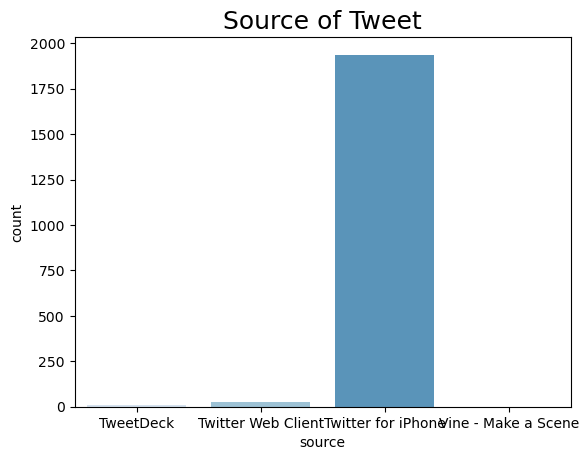

In [127]:
sns.countplot(x='source', data=master_dataframe, palette='Blues')

# Set the title of the chart
plt.title('Source of Tweet', fontsize=18)

# Show the chart
plt.show()

The visual above shows that most tweet are from iphone users

### Question 2
Which dog had the highest and least retweets on average

In [128]:
mean_retweet_count = master_dataframe.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

In [129]:
mean_retweet_count

dog_stage
doggo, puppo      19196.000000
doggo              7125.698413
puppo              6473.954545
floofer            4968.714286
doggo, pupper      4083.444444
doggo, floofer     3433.000000
pupper             2363.581281
Name: retweet_count, dtype: float64

The dog with the highest retweet on average is doggo, puppo while the dog with lowest retweet on average is pupper

### Question 3
What is the relationship between retweets and likes?

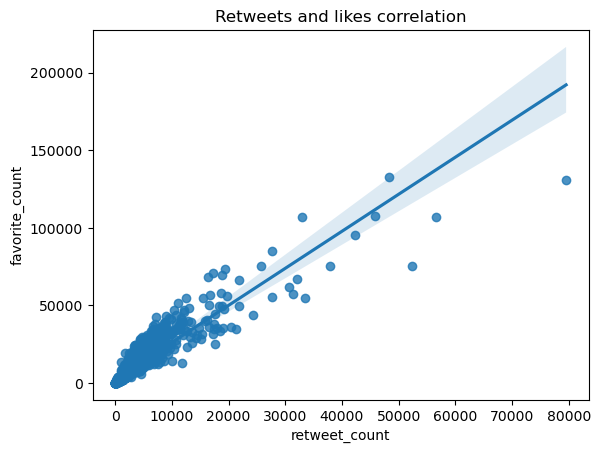

In [130]:
 plt.title('Retweets and likes correlation')
ax = sns.regplot(x="retweet_count", y="favorite_count", data=master_dataframe)

There is a strong positive relationship between retweet_count and favorite_count